In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
link_to_dataset = 'https://raw.githubusercontent.com/aiedu-courses/eda_and_dev_tools/refs/heads/main/datasets/abalone.csv'

In [3]:
df  = pd.read_csv(link_to_dataset)

## Описание данных

* `Sex` - пол особи, мужская/женская/младенец
* `Length` - наибольшаяя длина раковины, мм
* `Diameter` - диаметр раковины, измеряемый перпендикулярно длине, мм
* `Height` - высота абалона вместе с мясом в раковине, мм
* `Whole weight` - масса целого абалона (включая раковину и внутренности), г
* `Shucked weight` - масса только мяса после извлечения из раковины, г
* `Viscera weight` - масса внутренностей (включая кишечник) после удаления крови, г
* `Shell weight` - масса раковины после высушивания, г
* `Rings` - количество колец на раковине. Чтобы определить возраст абалона в годах, к числу колец добавляют 1.5 (целевой признак)

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,NaN,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Исследование данных

In [5]:
print(f"Размер таблицы: {df.shape}")

Размер таблицы: (4177, 9)


Информация о типах данных и пропусках

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4078 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4078 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4127 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Наличие пропусков в столбцах Diameter, Whole weight, и Shell weight требует их обработки перед построением модели.

Основные числовые характеристики

In [7]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4078.000000,4177.000000,4078.000000,4177.000000,4177.000000,4127.000000,4177.000000
mean,0.523992,0.407840,0.139516,0.827306,0.359367,0.180594,0.239072,9.933684
std,0.120093,0.099286,0.041827,0.490348,0.221963,0.109614,0.138942,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.440500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.798500,0.336000,0.171000,0.235000,9.000000
75%,0.615000,0.480000,0.165000,1.150875,0.502000,0.253000,0.328250,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [8]:
df.describe(include='object')

,Sex
count,4177
unique,4
top,M
freq,1447


По числовым характеристикам становятся заметны аномальные значения высоты аболона (минимальная высота равна 0) и 4 каатегории в категориальном признаке вместо трех.

In [9]:
df.duplicated().sum()

0

Дубликаты не обнаружены

## Работа с пропущенными значениями

In [10]:
df.isnull().mean() * 100

,0
Sex,0.000000
Length,0.000000
Diameter,2.370122
Height,0.000000
Whole weight,2.370122
Shucked weight,0.000000
Viscera weight,0.000000
Shell weight,1.197031
Rings,0.000000


Пропущенные значения составляют небольшой процент от пропущенных данных, поэтому, чтобы избежать влияние выбросов, заменим их медианным значением

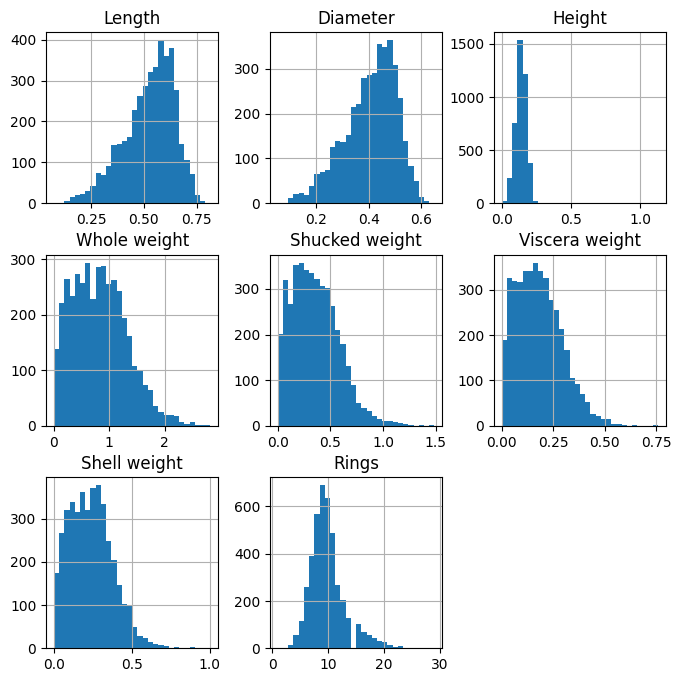

In [11]:
df.hist(bins=30, figsize=(8,8));

In [12]:
df.fillna({
    'Diameter': df['Diameter'].median(),
    'Whole weight': df['Whole weight'].median(),
    'Shell weight': df['Shell weight'].median()
}, inplace=True)

In [13]:
df.isnull().mean().sum()

0.0

Теперь пропущенных значений нет

## Однофакторный анализ

In [14]:
df['Height'][df['Height']==0]

,Height
1257,0.0
3996,0.0


Аномальных данных мало, в таком случае просто удалим эти строчки

In [15]:
df = df[df['Height'] > 0]

In [16]:
len(df['Height'][df['Height']==0])

0

In [17]:
df.describe(include='object')

,Sex
count,4175
unique,4
top,M
freq,1447


In [18]:
df['Sex'].unique()

array(['M', 'F', 'I', 'f'], dtype=object)

Допущена опечатка в данных, вместо `f` должно быть `F`

In [19]:
print(f"Число f: {len(df['Sex'][df['Sex']=='f'])}")

Число f: 195


In [20]:
df['Sex'] = df['Sex'].replace('f', 'F')

<ipython-input-20-9473e7df28c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].replace('f', 'F')


In [21]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4175 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4175 non-null   object 
 1   Length          4175 non-null   float64
 2   Diameter        4175 non-null   float64
 3   Height          4175 non-null   float64
 4   Whole weight    4175 non-null   float64
 5   Shucked weight  4175 non-null   float64
 6   Viscera weight  4175 non-null   float64
 7   Shell weight    4175 non-null   float64
 8   Rings           4175 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 326.2+ KB


Данные подготовлены, устранены аномальные значения высоты аболона, опечатки в категориальном признаке и пропущенные значения в датасете

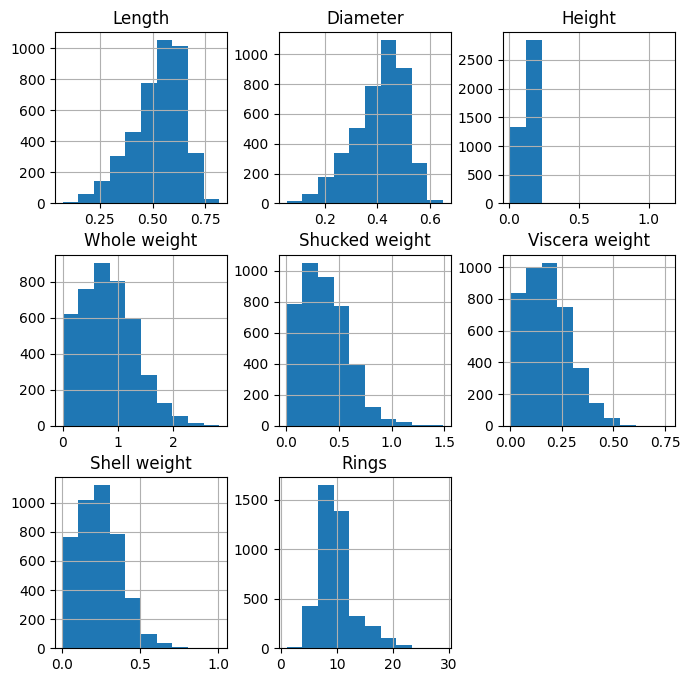

In [23]:
df.hist(bins=10, figsize=(8,8));

Распределения многих признаков отклоняются влево

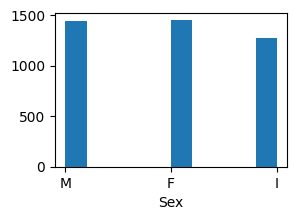

In [24]:
plt.figure(figsize=(3,2))
plt.hist(df.Sex)
plt.xlabel('Sex');

Распределение категориального признака почти равномерное

Сколько весит самый тяжелый аболон?А легкий?

In [25]:
df['Whole weight'].min(), df['Whole weight'].max()

(0.002, 2.8255)

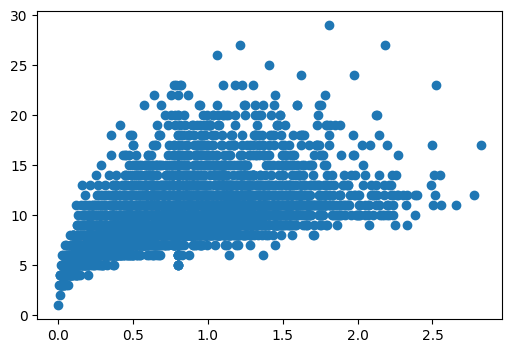

In [26]:
plt.figure(figsize=(6,4))
plt.scatter(df['Whole weight'], df['Rings']);

Зависимость Числа колец от полного веса аболона напоминает график функции корень из x

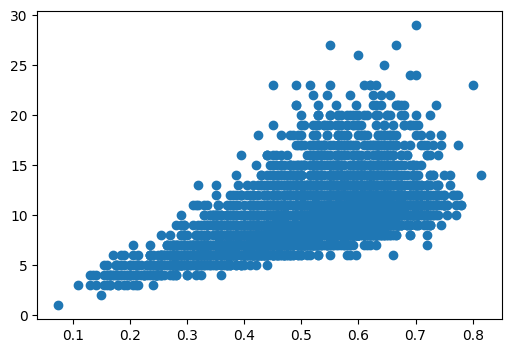

In [27]:
plt.figure(figsize=(6,4))
plt.scatter(df['Length'], df['Rings']);

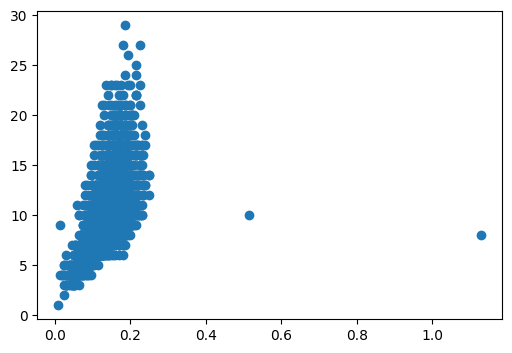

In [28]:
plt.figure(figsize=(6,4))
plt.scatter(df['Height'], df['Rings']);

Можно отметить разную похожую на линейную связь числа колец и длины, высоты аболона

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


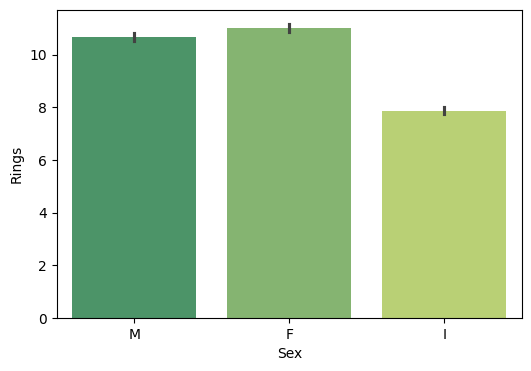

In [29]:
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Rings', data=df, hue='Sex', palette='summer');

Заметных отличий в числе колец между женским и мужским полом не замечено. У младенцев меньшее число колец, что логично.

Посчитаем среднее и медианное число колец для каждого пола, а так же вес

In [30]:
df.groupby('Sex').agg(
    Whole_weight_Mean=('Whole weight', 'mean'),
    Whole_weight_Median=('Whole weight', 'median'),
    HeightMean=('Height', 'mean'),
    HeightMedian=('Height', 'median'),
    RingsMean=('Rings', 'mean'),
    RingsMedian=('Rings', 'median')
)

,Whole_weight_Mean,Whole_weight_Median,HeightMean,HeightMedian,RingsMean,RingsMedian
Sex,,,,,,
F,1.017649,0.99475,0.155959,0.155,11.001376,10.0
I,0.438378,0.39100,0.108100,0.110,7.873626,8.0
M,0.977255,0.95500,0.150847,0.150,10.678645,10.0


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


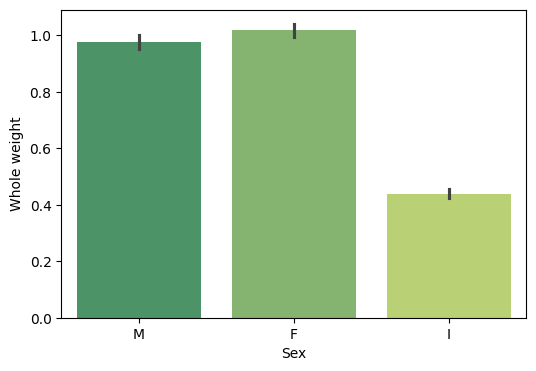

In [31]:
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Whole weight', data=df, hue='Sex', palette='summer');

Число колец у аболона сильно зависит от его веса и здесь прослеживается аналогичное распределение

## Взаимозависимость в данных

<Axes: >

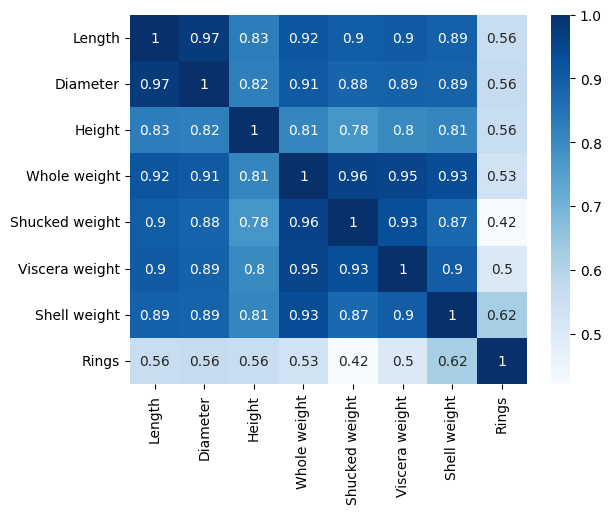

In [32]:
# Корреляция Пирсона
corr = df.corr(numeric_only=True) # матрица корреляций
sns.heatmap(corr, cmap="Blues", annot=True)

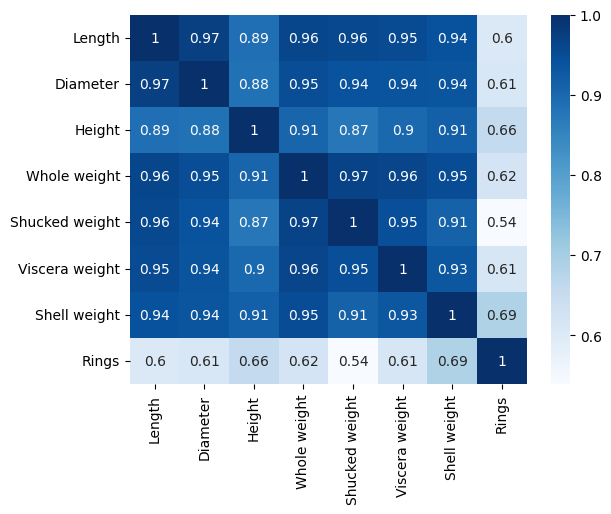

In [33]:
# Корреляция Спирмена
corr_spearman = df.corr(method='spearman', numeric_only=True)
sns.heatmap(corr_spearman, cmap="Blues", annot=True);

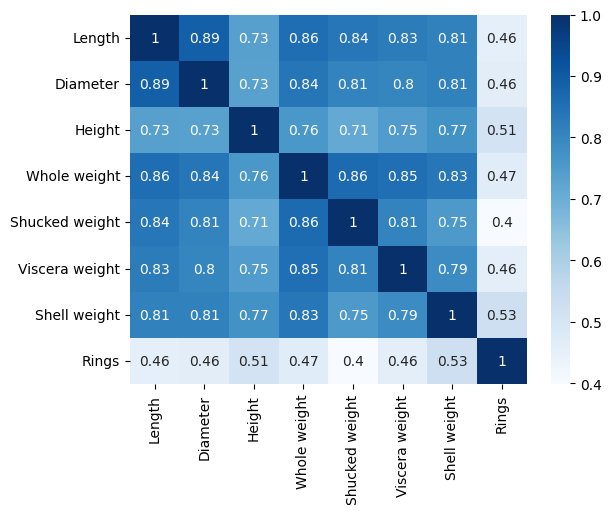

In [34]:
# Корреляция Кендалла
corr_kendall = df.corr(method='kendall', numeric_only=True)
sns.heatmap(corr_kendall, cmap="Blues", annot=True);

Статистикy $\chi^2$ посчитать не сможем, так как у нас только один категориальный признак. Попробуем посчитать параметр ANOVA.

In [35]:
from scipy.stats import f_oneway

Data = []

for c1 in df.columns:
    for c2 in df.columns:
        if df[c1].dtype == 'object' and df[c2].dtype != 'object':
            CategoryGroupLists = df.groupby(c1)[c2].apply(list)
            AnovaResults = f_oneway(*CategoryGroupLists)

            if AnovaResults[1] >= 0.05:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'No'})
            else:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'Yes'})

AnovaRes = pd.DataFrame.from_dict(Data)
AnovaRes

,Category,Numerical,Is correlated
0,Sex,Length,Yes
1,Sex,Diameter,Yes
2,Sex,Height,Yes
3,Sex,Whole weight,Yes
4,Sex,Shucked weight,Yes
5,Sex,Viscera weight,Yes
6,Sex,Shell weight,Yes
7,Sex,Rings,Yes


Все параметры сильно коррелируются с целевой переменной, большую корреляцию можно отметить между массой аболона после высушивания и числом колец. Категориальный признак коррелирует со всеми числовыми признаками.

## Анализ распределения столбцов (целевой переменной)

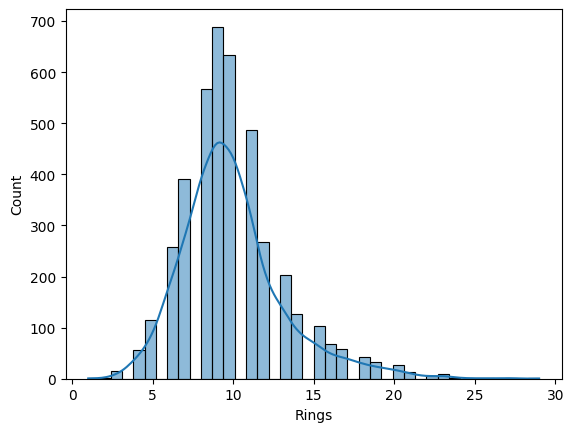

In [36]:
sns.histplot(data = df['Rings'], bins=40, kde = True);

Распределение целевого признака похоже на нормальное с отклонением влево. С большим числом колец предсказания будут менее точными ввиду меньшего количества данных для них

In [37]:
X = df[['Shell weight']]
y = df['Rings']

In [38]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

pred = lr.predict(X)

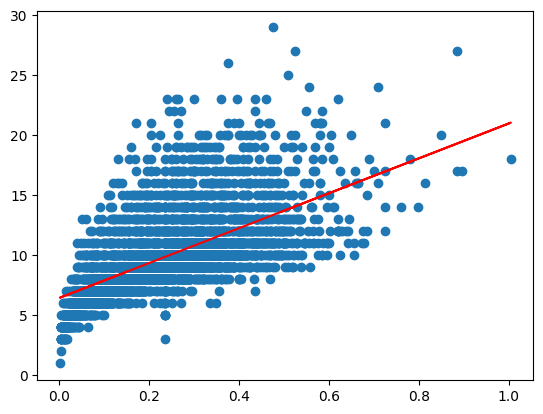

In [39]:
plt.scatter(X.values, y)
plt.plot(X.values, pred, c='red')

In [40]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y, pred)

6.365130225030992

In [41]:
np.mean(y)

9.93508982035928

In [42]:
mean_squared_error(y[y < 18], pred[y < 18])

4.430809361405981

Так и получается, если мы ограничимся данными в пределах примерно двух сигм, где данных больше, то среднеквадратичная ошибка будет меньше.

## Cравнение скорости работы Pandas и Polars

In [43]:
df_big = df.copy()

for i in range(238):
  df_big = pd.concat([df_big, df])

In [44]:
m_rows = 1000000 - df_big.shape[0]
df_big = pd.concat([df_big, df.iloc[:m_rows]])
df_big.to_csv("diamonds_big.csv", index=False)

In [45]:
df_big.shape, df.shape

((1000000, 9), (4175, 9))

In [46]:
!pip install polars

import polars as pl

print(pd.__version__)
print(pl.__version__)

2.2.2
1.7.1


### Загрузка данных

In [56]:
%%time

df = pd.read_csv("diamonds_big.csv")

CPU times: user 680 ms, sys: 83.8 ms, total: 764 ms
Wall time: 765 ms


In [57]:
%%time

df_pl = pl.read_csv("diamonds_big.csv")

CPU times: user 644 ms, sys: 69.8 ms, total: 714 ms
Wall time: 402 ms


### Выбор и фильтрация данных

In [58]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.7985,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [59]:
%%time

df[['Length', 'Whole weight']]

CPU times: user 7.87 ms, sys: 1.96 ms, total: 9.84 ms
Wall time: 8.06 ms


,Length,Whole weight
0,0.455,0.5140
1,0.350,0.2255
2,0.530,0.6770
3,0.440,0.7985
4,0.330,0.2050
...,...,...
999995,0.190,0.0295
999996,0.215,0.0385
999997,0.595,0.7990
999998,0.645,1.1845


In [60]:
%%time

df_pl[['Length', 'Whole weight']]

CPU times: user 133 µs, sys: 18 µs, total: 151 µs
Wall time: 155 µs


Length,Whole weight
f64,f64
0.455,0.514
0.35,0.2255
0.53,0.677
0.44,0.7985
0.33,0.205
…,…
0.19,0.0295
0.215,0.0385
0.595,0.799


In [61]:
# Pandas
%%time

df.query('Diameter > 0.2')

CPU times: user 39.3 ms, sys: 31.3 ms, total: 70.6 ms
Wall time: 67.4 ms


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.7985,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
...,...,...,...,...,...,...,...,...,...
999992,M,0.335,0.235,0.085,0.1545,0.0660,0.0345,0.045,6
999994,M,0.285,0.210,0.075,0.1185,0.0550,0.0285,0.040,7
999997,M,0.595,0.465,0.125,0.7990,0.3245,0.2000,0.230,10
999998,F,0.645,0.500,0.170,1.1845,0.4805,0.2740,0.355,13


In [62]:
# Polars
%%time

df_pl.filter(pl.col('Diameter') > 0.2)

CPU times: user 26.7 ms, sys: 11.1 ms, total: 37.9 ms
Wall time: 28.3 ms


Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
str,f64,f64,f64,f64,f64,f64,f64,i64
"""M""",0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
"""M""",0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7
"""F""",0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9
"""M""",0.44,0.365,0.125,0.7985,0.2155,0.114,0.155,10
"""I""",0.33,0.255,0.08,0.205,0.0895,0.0395,0.055,7
…,…,…,…,…,…,…,…,…
"""M""",0.335,0.235,0.085,0.1545,0.066,0.0345,0.045,6
"""M""",0.285,0.21,0.075,0.1185,0.055,0.0285,0.04,7
"""M""",0.595,0.465,0.125,0.799,0.3245,0.2,0.23,10


### Агрегация данных

In [63]:
%%time

df.groupby('Sex').agg({'Shell weight' : 'mean', 'Rings' : 'max'})

CPU times: user 84.6 ms, sys: 16 ms, total: 101 ms
Wall time: 103 ms


,Shell weight,Rings
Sex,,
F,0.294594,29
I,0.129709,21
M,0.279415,27


In [64]:
%%time

df_pl.group_by('Sex').agg([pl.mean('Shell weight'), pl.max('Rings')])

CPU times: user 42.8 ms, sys: 35.2 ms, total: 78 ms
Wall time: 55.5 ms


Sex,Shell weight,Rings
str,f64,i64
"""F""",0.294594,29
"""M""",0.279415,27
"""I""",0.129709,21


Сравнивая время работы двух библиотек, можно отметить быструю работу Polars.